In [2]:
 from fastai.vision.all import *
 path = untar_data(URLs.PETS)/'images'
 def is_cat(x): return x[0].isupper()
 dls = ImageDataLoaders.from_name_func(
     path, get_image_files(path), valid_pct=0.2, seed=42,
     label_func=is_cat, item_tfms=Resize(224))

In [3]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 76.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.164241,0.033085,0.011502,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.052732,0.015745,0.006766,00:32


In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

     

In [2]:
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

NameError: name 'learn' is not defined

In [27]:
ims = search_images_ddg("grizzly bear")

In [28]:
len(ims)

200

In [2]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')
if not path.exists():
    path.mkdir()
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear')
    download_images(dest, urls=results)

In [3]:
fns = get_image_files(path)
fns

(#566) [Path('bears/grizzly/d7a21df4-d685-40f9-86d5-e3124396955e.jpg'),Path('bears/grizzly/4a1e8d83-07cb-44df-8af7-8a1a1fd0742e.jpg'),Path('bears/grizzly/d4fdc811-4113-4889-879a-57298f02400a.jpg'),Path('bears/grizzly/1314beef-8835-4c16-8f18-7c18e5bc09bc.jpg'),Path('bears/grizzly/214c28ec-d96c-4b2b-961a-3148e7b6db35.jpg'),Path('bears/grizzly/daff11f9-b996-4f44-a52a-4d945a7d558b.jpg'),Path('bears/grizzly/889109a2-1286-47ee-9dac-7329874482b2.jpg'),Path('bears/grizzly/c23dbaa5-2b0f-4d09-a3ea-0658973afae8.jpg'),Path('bears/grizzly/2fcfaaad-455e-40b4-8256-59c5666e5d8c.jpg'),Path('bears/grizzly/206e5b5d-3502-4824-a105-2a51657e838e.jpg')...]

In [4]:
failed = verify_images(fns)
failed

(#15) [Path('bears/grizzly/98e52909-d9bd-414f-a9e9-a01304921fc1.JPG'),Path('bears/grizzly/c7ca88d5-7f64-43ab-8b86-c2302fae2ade.jpg'),Path('bears/grizzly/8154c934-edea-44e8-aacf-96c63d9e3e6c.jpg'),Path('bears/teddy/0be96e45-98bf-463d-9ffc-7d723c09f660.jpg'),Path('bears/teddy/bbfee31f-4619-4e80-b05a-410febcfe342.jpg'),Path('bears/teddy/e28da68a-3ed7-4622-aa84-b9e3b7b7d677.jpg'),Path('bears/teddy/f0a50f08-014d-4478-9343-60cf7066d14c.JPG'),Path('bears/teddy/73bd0645-e9e1-4ff1-abc3-6700004ffcb7.jpg'),Path('bears/teddy/63f05c00-a2bf-4e97-986c-e42c00389481.jpg'),Path('bears/teddy/3fd9937a-2308-4efb-8f66-69020e8f9dcf.JPG')...]

In [5]:
failed.map(Path.unlink);

In [6]:
bears = DataBlock(
 blocks=(ImageBlock, CategoryBlock),
 get_items=get_image_files,
 splitter=RandomSplitter(valid_pct=0.2, seed=42),
 get_y=parent_label,
 item_tfms=Resize(128))

In [7]:
dls = bears.dataloaders(path)

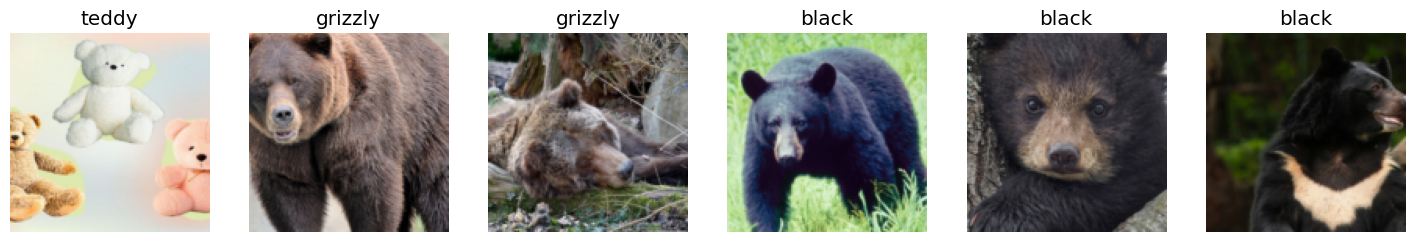

In [8]:
dls.valid.show_batch(max_n=6, nrows=1)

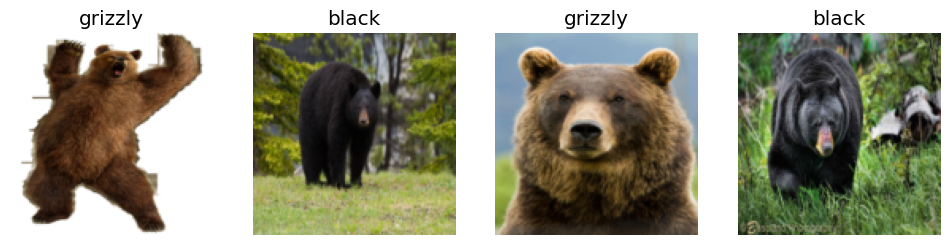

In [42]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

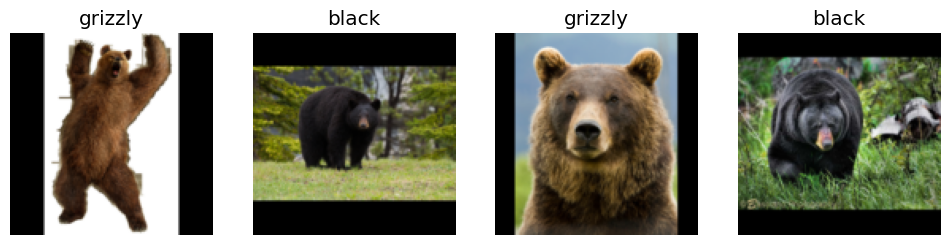

In [43]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

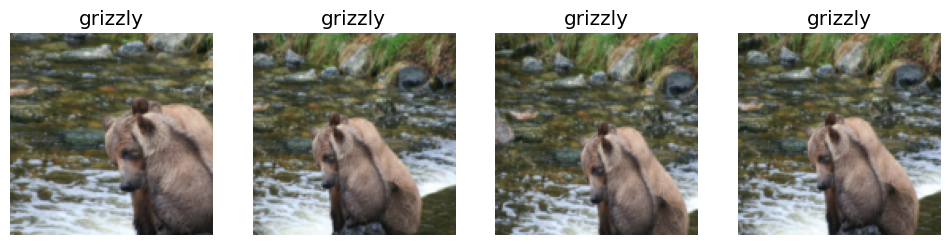

In [44]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

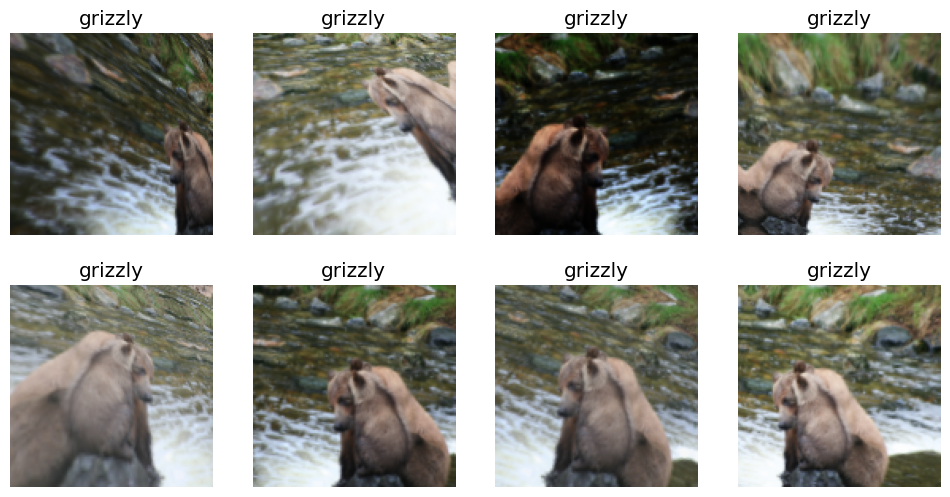

In [45]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Start training

In [9]:
bears = bears.new(
item_tfms=RandomResizedCrop(224, min_scale=0.5),
batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 131MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.279018,0.074360,0.036364,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.275272,0.037132,0.009091,00:17
1,0.234588,0.037855,0.009091,00:18
2,0.183483,0.036829,0.009091,00:16
3,0.169037,0.034143,0.009091,00:16


In [11]:
1+1

2

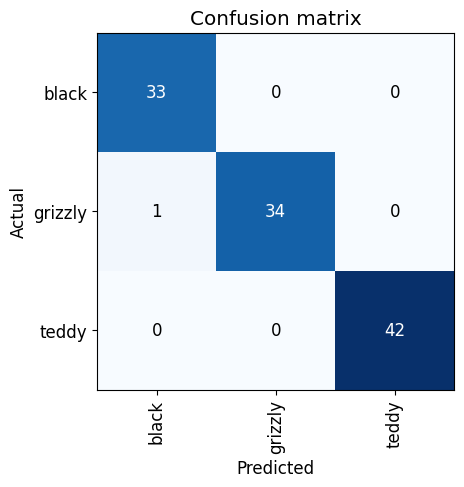

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

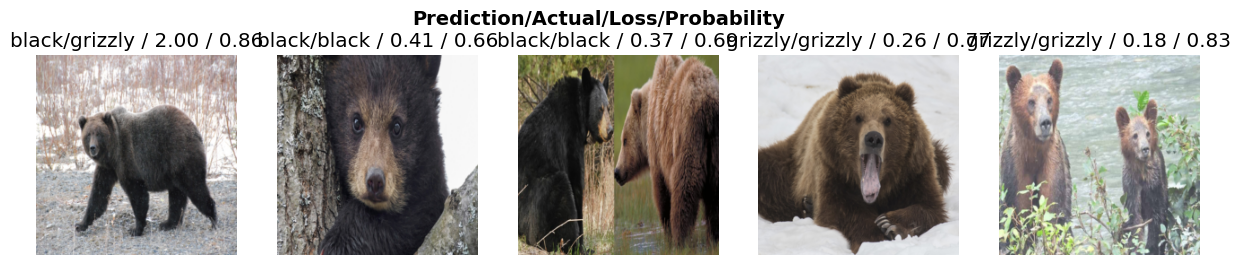

In [17]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [18]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [19]:
 for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [20]:
learn.export()

In [3]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [5]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath
learn_inf = load_learner(path/'export.pkl')

In [6]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [10]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

In [19]:
dir(btn_upload.value[0]['content'])


['__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'c_contiguous',
 'cast',
 'contiguous',
 'f_contiguous',
 'format',
 'hex',
 'itemsize',
 'nbytes',
 'ndim',
 'obj',
 'readonly',
 'release',
 'shape',
 'strides',
 'suboffsets',
 'tobytes',
 'tolist',
 'toreadonly']

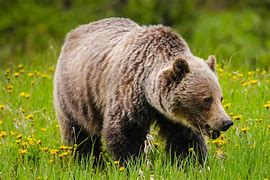

In [21]:
from io import BytesIO
img = PILImage.create(BytesIO(btn_upload.value[-1].content))
img

In [22]:
 out_pl = widgets.Output()
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 out_pl

Output()

In [23]:
pred,pred_idx,probs = learn_inf.predict(img)

In [24]:
 lbl_pred = widgets.Label()
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
 lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9989')

In [25]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [37]:
labels = learn_inf.dls.vocab
def on_click_classify(img):
     img = PILImage.create(img)
     pred,pred_idx,probs = learn_inf.predict(img)
     return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [27]:
 VBox([widgets.Label('Select your bear!'),
 btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
title = "Bear Classifier"


In [38]:
import gradio as gr
gr.Interface(fn=on_click_classify, inputs=gr.Image(), outputs=gr.Label(num_top_classes=3)).launch(share=True)

Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
